# Averiguar el precio de las casas
Para ello prueblo los modelos:  
- Regresión lineal.
- Arbol de decisión.
- Random Forest.
- XGBOOST

In [1143]:
import os
import pandas as pd
data = pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [1144]:
descripcion = data.describe(include = "all").T
descripcion["Nulos"] = data.isnull().sum()
descripcion["Tipos"] = data.dtypes
descripcion["Unicos"] = data.nunique()
descripcion.head(len(data))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Nulos,Tipos,Unicos
price,545.0,NaN,NaN,NaN,4766729.247706,1870439.615657,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0,0,int64,219
area,545.0,NaN,NaN,NaN,5150.541284,2170.141023,1650.0,3600.0,4600.0,6360.0,16200.0,0,int64,284
bedrooms,545.0,NaN,NaN,NaN,2.965138,0.738064,1.0,2.0,3.0,3.0,6.0,0,int64,6
bathrooms,545.0,NaN,NaN,NaN,1.286239,0.50247,1.0,1.0,1.0,2.0,4.0,0,int64,4
stories,545.0,NaN,NaN,NaN,1.805505,0.867492,1.0,1.0,2.0,2.0,4.0,0,int64,4
mainroad,545,2,yes,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object,2
guestroom,545,2,no,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object,2
basement,545,2,no,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object,2
hotwaterheating,545,2,no,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object,2
airconditioning,545,2,no,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object,2


In [1145]:
for column in data.columns:
    print(f"Columna: {column}")
    try:
        unique_values = sorted(data[column].dropna().unique())
        print(f"Valores únicos ordenados: {unique_values}")
    except TypeError:
        unique_values = data[column].dropna().unique()
        print(f"Valores únicos (no ordenados): {list(unique_values)}")
    print("-" * 130)

Columna: price
Valores únicos ordenados: [1750000, 1767150, 1820000, 1855000, 1890000, 1960000, 2100000, 2135000, 2233000, 2240000, 2275000, 2310000, 2345000, 2380000, 2408000, 2450000, 2485000, 2520000, 2590000, 2604000, 2653000, 2660000, 2695000, 2730000, 2800000, 2835000, 2852500, 2870000, 2940000, 2961000, 2975000, 3003000, 3010000, 3045000, 3080000, 3087000, 3115000, 3118850, 3129000, 3143000, 3150000, 3220000, 3234000, 3255000, 3290000, 3325000, 3332000, 3353000, 3360000, 3395000, 3423000, 3430000, 3465000, 3493000, 3500000, 3535000, 3570000, 3605000, 3633000, 3640000, 3675000, 3703000, 3710000, 3745000, 3773000, 3780000, 3815000, 3836000, 3850000, 3885000, 3920000, 3990000, 4007500, 4025000, 4060000, 4095000, 4098500, 4123000, 4130000, 4165000, 4193000, 4200000, 4235000, 4270000, 4277000, 4305000, 4319000, 4340000, 4375000, 4382000, 4403000, 4410000, 4445000, 4473000, 4480000, 4515000, 4543000, 4550000, 4585000, 4613000, 4620000, 4655000, 4690000, 4753000, 4760000, 4767000, 4795

Saco las columnas que no me ha dicho el código anterior

In [1146]:
print('hotwaterheating')
print(data['hotwaterheating'].unique())
print('airconditioning')
print(data['airconditioning'].unique())
print('parking')
print(data['parking'].unique())
print('prefarea')
print(data['prefarea'].unique())

hotwaterheating
['no' 'yes']
airconditioning
['yes' 'no']
parking
[2 3 0 1]
prefarea
['yes' 'no']


Nombres de las columnas. Y cuantas filas y columnas hay.

In [1147]:
print(data.columns)

num_filas, num_columnas = data.shape
print(f"El DataFrame tiene {num_filas} filas y {num_columnas} columnas.")


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
El DataFrame tiene 545 filas y 13 columnas.


Por cada columna, cada valor cuántas filas tiene.

In [1148]:
print(data['price'].value_counts())
print(data['area'].value_counts())

price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64
area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64


In [1149]:
print(data['bedrooms'].value_counts())

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64


In [1150]:
print(data['bathrooms'].value_counts())

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64


In [1151]:
print(data['stories'].value_counts())

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64


In [1152]:
print(data['mainroad'].value_counts())

mainroad
yes    468
no      77
Name: count, dtype: int64


In [1153]:
print(data['guestroom'].value_counts())

guestroom
no     448
yes     97
Name: count, dtype: int64


In [1154]:
print(data['basement'].value_counts())

basement
no     354
yes    191
Name: count, dtype: int64


In [1155]:
print(data['hotwaterheating'].value_counts())

hotwaterheating
no     520
yes     25
Name: count, dtype: int64


In [1156]:
print(data['airconditioning'].value_counts())

airconditioning
no     373
yes    172
Name: count, dtype: int64


In [1157]:
print(data['parking'].value_counts())

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64


In [1158]:
print(data['prefarea'].value_counts())

prefarea
no     417
yes    128
Name: count, dtype: int64


In [1159]:
print(data['furnishingstatus'].value_counts())

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


Categorizo las columnas object

In [1160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [1161]:
categoria_map = {
    'no': 1,
    'yes': 2
}
data['mainroad'] = data['mainroad'].map(categoria_map)
print(data['mainroad'].head())

guestroom_map = {
    'no': 1,
    'yes': 2
}
data['guestroom'] = data['guestroom'].map(guestroom_map)
print(data['guestroom'].head())

basement_map = {
    'no': 1,
    'yes': 2
}
data['basement'] = data['basement'].map(basement_map)
print(data['basement'].head())

hotwaterheating_map = {
    'no': 1,
    'yes': 2
}
data['hotwaterheating'] = data['hotwaterheating'].map(hotwaterheating_map)
print(data['hotwaterheating'].head())

airconditioning_map = {
    'no': 1,
    'yes': 2
}
data['airconditioning'] = data['airconditioning'].map(airconditioning_map)
print(data['airconditioning'].head())

prefarea_map = {
    'no': 1,
    'yes': 2
}
data['prefarea'] = data['prefarea'].map(prefarea_map)
print(data['prefarea'].head())

furnishingstatus_map = {
    'semi-furnished': 1,
    'unfurnished': 2,
    'furnished' : 3
}
data['furnishingstatus'] = data['furnishingstatus'].map(furnishingstatus_map)
print(data['furnishingstatus'].head())


0    2
1    2
2    2
3    2
4    2
Name: mainroad, dtype: int64
0    1
1    1
2    1
3    1
4    2
Name: guestroom, dtype: int64
0    1
1    1
2    2
3    2
4    2
Name: basement, dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: hotwaterheating, dtype: int64
0    2
1    2
2    1
3    2
4    2
Name: airconditioning, dtype: int64
0    2
1    1
2    2
3    2
4    1
Name: prefarea, dtype: int64
0    3
1    3
2    1
3    3
4    3
Name: furnishingstatus, dtype: int64


In [1162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


Correlaciones negativas menores de -40%:
Series([], dtype: float64)

Correlaciones positivas mayores de 40%:
price     area               53.599735
          bathrooms          51.754534
          stories            42.071237
          airconditioning    45.295408
bedrooms  stories            40.856424
dtype: float64


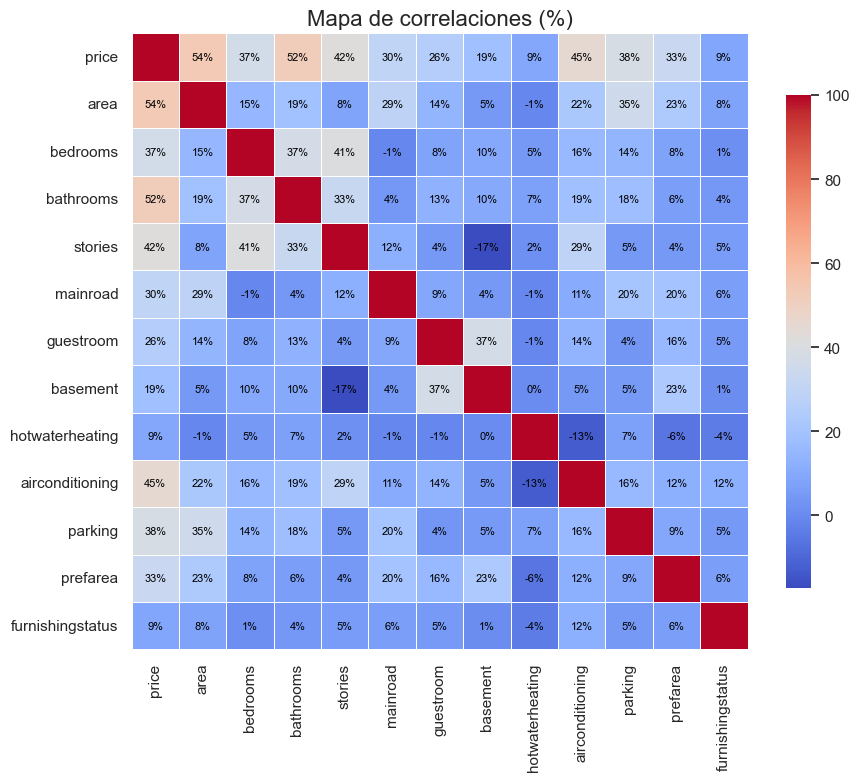

In [1163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo columnas numéricas
data_numeric = data.select_dtypes(include=['number'])

# Calcular la matriz de correlación en porcentajes
correlation_matrix = data_numeric.corr() * 100

# Eliminar la columna y fila 'ID' si existe
correlation_matrix_no_id = correlation_matrix.drop(index="ID", columns="ID", errors='ignore')

# Obtener las correlaciones por encima de la diagonal principal
correlation_pairs = correlation_matrix_no_id.where(
    ~np.tril(np.ones(correlation_matrix_no_id.shape)).astype(bool)
)

# Filtrar correlaciones negativas menores a -40% y positivas mayores a 40%
negative_corr = correlation_pairs[correlation_pairs < -40].stack()
positive_corr = correlation_pairs[correlation_pairs > 40].stack()

# Imprimir resultados
print("Correlaciones negativas menores de -40%:")
print(negative_corr)
print("\nCorrelaciones positivas mayores de 40%:")
print(positive_corr)

# Visualizar el mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=False,          # Cambia a True si quieres los valores en el heatmap
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

# Agregar porcentajes como texto en el mapa de calor
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        if i != j:  # Evitar la diagonal principal
            value = f"{correlation_matrix.iloc[i, j]:.0f}%"
            plt.text(
                j + 0.5, i + 0.5, value,
                ha='center', va='center', color='black', fontsize=8
            )

plt.title("Mapa de correlaciones (%)", fontsize=16)
plt.show()

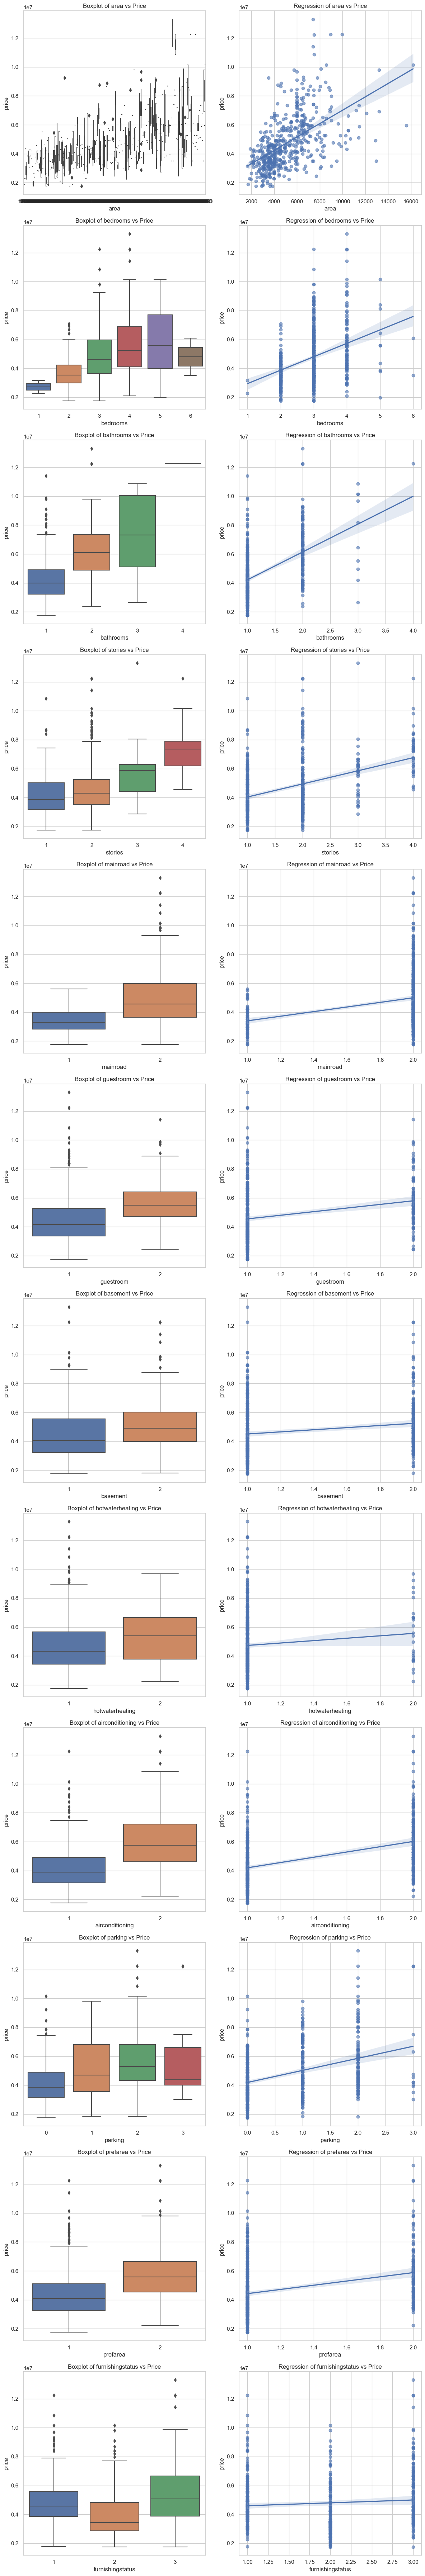

In [1164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Configuración del estilo
sns.set(style="whitegrid")

# Obtener las columnas de `data` que no sean `price`
columns = [col for col in data.columns if col != 'price']

# Crear un subplot para cada variable
fig, axes = plt.subplots(len(columns), 2, figsize=(12, 6 * len(columns)))

for i, col in enumerate(columns):
    # Boxplot de la columna frente a `price`
    sns.boxplot(x=data[col], y=data['price'], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {col} vs Price')

    # Scatter plot con línea de regresión
    sns.regplot(x=data[col], y=data['price'], ax=axes[i, 1], scatter_kws={'alpha': 0.6})
    axes[i, 1].set_title(f'Regression of {col} vs Price')

# Ajustar el layout
plt.tight_layout()
plt.show()


Elimino outliers en area y precio

In [1165]:
eliminar_outliers = True
if eliminar_outliers == True:
    data = data[(data["area"] < 11000) & (data["price"] < 9500000)]

<Axes: xlabel='area', ylabel='price'>

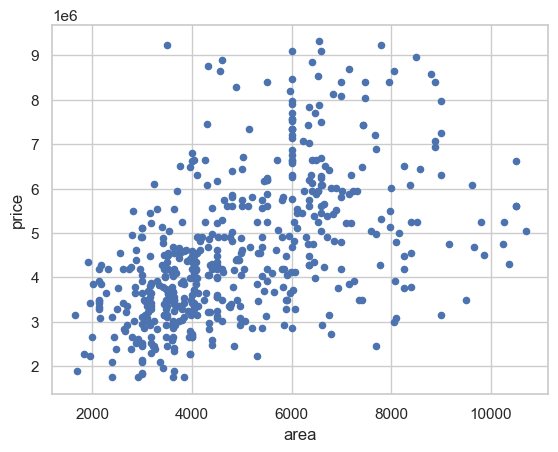

In [1166]:
data.plot(kind="scatter", x="area", y="price")


Pairplot con las variables con más correlación.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

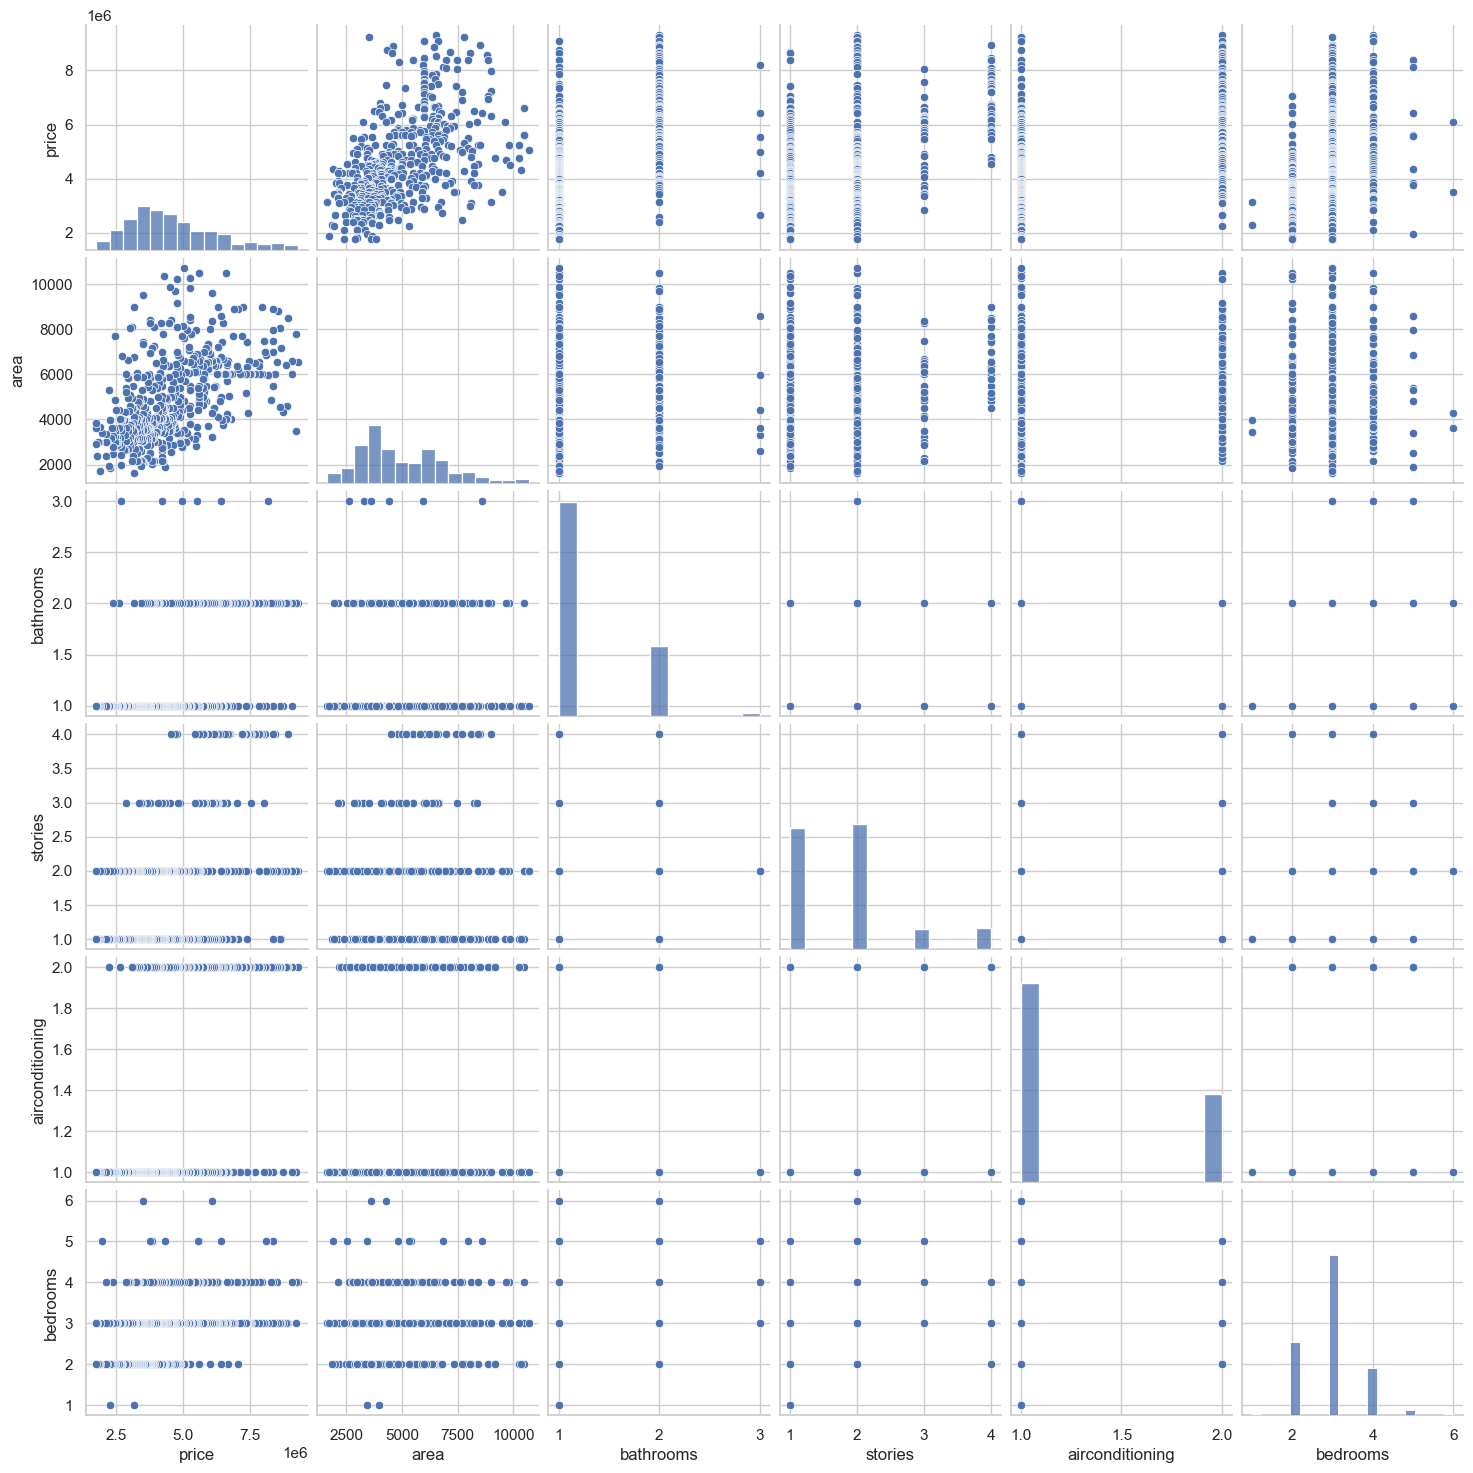

In [1167]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Este gráfico no admite NAs
datoscompletos = data.dropna()[['price', 'area', 'bathrooms', 'stories', 'airconditioning', 'bedrooms']]
sns.pairplot(datoscompletos)

# Regresión lineal univariante

Selecciono las variables de interés

In [1168]:
X = data[['area']]  # Variable independiente (cantidad de cemento) (el doble corchete es para que la salida sea un DataFrame)
y = data['price']  # Variable dependiente (dureza)

Separamos los datos de entrenamiento y test

In [1169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1170]:
print(len(X_train))
print(len(X_test))

419
105


Regresión lineal

In [1171]:
from sklearn.linear_model import LinearRegression

Creo el modelo de regresión lineal

In [1172]:
model = LinearRegression()

Ajustar el modelo con los datos de entrenamiento


In [1173]:
model.fit(X_train, y_train)

LinearRegression()

Hacer predicciones en el conjunto de prueba

In [1174]:
y_pred = model.predict(X_test)

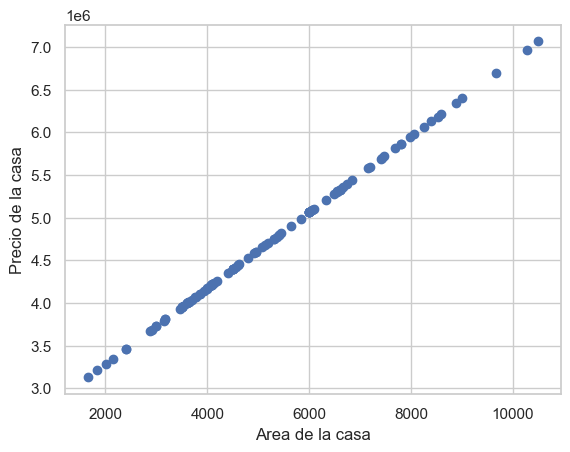

In [1175]:
from matplotlib import pyplot as plt
df = X_test.copy()
df["y_pred"] = y_pred
#plt(x = df["y_test"], y = df["cement"], figsize=(10, 6))
plt.scatter(df["area"], df["y_pred"])
plt.xlabel("Area de la casa")
plt.ylabel("Precio de la casa")
plt.show()

Visualizar la regresión

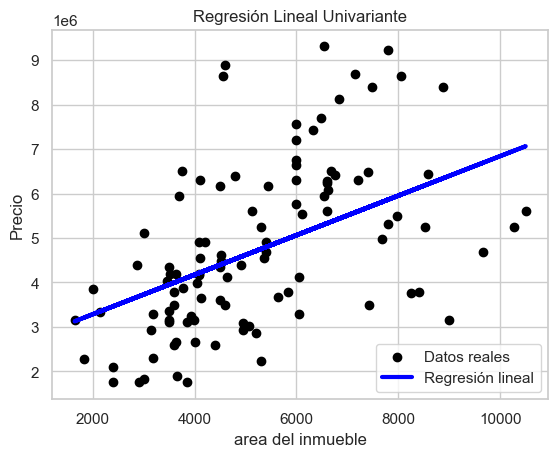

In [1176]:
plt.scatter(X_test["area"], y_test, color='black', label='Datos reales')
plt.plot(X_test["area"], y_pred, color='blue', linewidth=3, label='Regresión lineal')
plt.xlabel('area del inmueble')
plt.ylabel('Precio')
plt.title('Regresión Lineal Univariante')
plt.legend()
plt.show()

Representación gráfica de la prediccion vs valor real

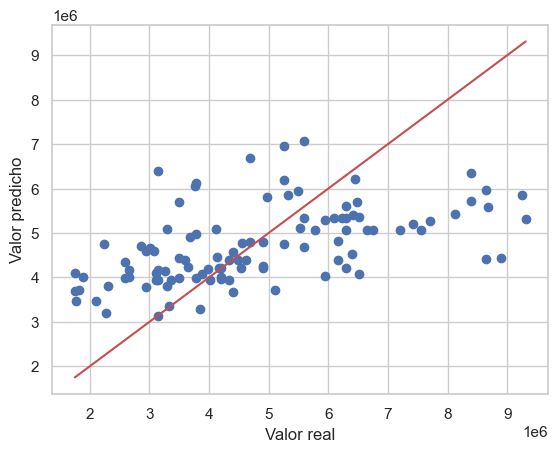

In [1177]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], "r")
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.show()

## Métricas de rendimiento

Funciones de error

In [1178]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [1179]:
model.score(X_train, y_train)

0.27013725523261256

In [1180]:
model.score(X_test, y_test)

0.2750846931429669

In [1181]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [1182]:
print(f'R al cuadrado (R²): {round(r2_score(y_test, y_pred), 4)} Objetivo --> 1')
print(f'Error Cuadrático Medio (Mean Squared Error MSE): {mean_squared_error(y_test, y_pred).round(2)} Objetivo --> 0')
print(f'Error Absoluto Medio (Mean Absolute Error MAE): {mean_absolute_error(y_test, y_pred).round(2)} Objetivo --> 0')

R al cuadrado (R²): 0.2751 Objetivo --> 1
Error Cuadrático Medio (Mean Squared Error MSE): 2551821456076.49 Objetivo --> 0
Error Absoluto Medio (Mean Absolute Error MAE): 1269109.22 Objetivo --> 0


In [1183]:
mse**0.5

1597442.1604792103

# Regresión lineal multivariante

Niormalización

In [1184]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_sin_columnas = ss.fit_transform(data)
datos_normalizados = pd.DataFrame(data_sin_columnas, columns = data.columns)

In [1185]:
datos_normalizados.describe().T

,count,mean,std,min,25%,50%,75%,max
price,524.0,0.000000e+00,1.000956,-1.756145,-0.723649,-0.205785,0.612460,2.894935
area,524.0,0.000000e+00,1.000956,-1.788024,-0.771540,-0.238837,0.630883,3.131325
bedrooms,524.0,3.254394e-16,1.000956,-2.660512,-1.293739,0.073034,0.073034,4.173351
bathrooms,524.0,2.169596e-16,1.000956,-0.571319,-0.571319,-0.571319,1.567047,3.705413
stories,524.0,2.711995e-17,1.000956,-0.922905,-0.922905,0.239600,0.239600,2.564612
mainroad,524.0,2.711995e-17,1.000956,-2.409397,0.415042,0.415042,0.415042,0.415042
guestroom,524.0,-5.423990e-17,1.000956,-0.464518,-0.464518,-0.464518,-0.464518,2.152768
basement,524.0,-1.762797e-16,1.000956,-0.726427,-0.726427,-0.726427,1.376600,1.376600
hotwaterheating,524.0,7.796986e-17,1.000956,-0.214262,-0.214262,-0.214262,-0.214262,4.667184
airconditioning,524.0,2.169596e-16,1.000956,-0.665978,-0.665978,-0.665978,1.501552,1.501552


Para recuperar los datos sin normalizar:

In [1186]:
datos_normalizados = data.copy()

In [1187]:
datos_normalizados.describe().T

,count,mean,std,min,25%,50%,75%,max
price,524.0,4.604489e+06,1.626982e+06,1750000.0,3428250.0,4270000.0,5600000.0,9310000.0
area,524.0,4.939382e+03,1.841432e+03,1650.0,3520.0,4500.0,6100.0,10700.0
bedrooms,524.0,2.946565e+00,7.323498e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,524.0,1.267176e+00,4.680937e-01,1.0,1.0,1.0,2.0,3.0
stories,524.0,1.793893e+00,8.610328e-01,1.0,1.0,2.0,2.0,4.0
mainroad,524.0,1.853053e+00,3.543910e-01,1.0,2.0,2.0,2.0,2.0
guestroom,524.0,1.177481e+00,3.824403e-01,1.0,1.0,1.0,1.0,2.0
basement,524.0,1.345420e+00,4.759593e-01,1.0,1.0,1.0,2.0,2.0
hotwaterheating,524.0,1.043893e+00,2.050531e-01,1.0,1.0,1.0,1.0,2.0
airconditioning,524.0,1.307252e+00,4.617956e-01,1.0,1.0,1.0,2.0,2.0


In [1188]:
X = datos_normalizados.drop(["price"], axis=1)
# X = X.drop(["basement"], axis=1)
y = datos_normalizados["price"]

Separo los datos en entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split

Dividido el conjunto de datos en conjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1191]:
print(len(X_train))
print(len(X_test))

419
105


Regresión lineal

In [1192]:
from sklearn.linear_model import LinearRegression

In [1193]:
model = LinearRegression()

In [1194]:
model.fit(X_train, y_train)

LinearRegression()

In [1195]:
y_pred = model.predict(X_test)

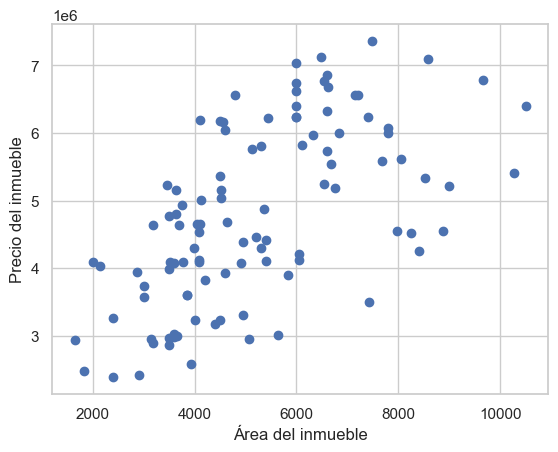

In [1196]:
from matplotlib import pyplot as plt
df = X_test.copy()
df["y_pred"] = y_pred
#plt(x = df["y_test"], y = df["cement"], figsize=(10, 6))
plt.scatter(df["area"], df["y_pred"])
plt.xlabel("Área del inmueble")
plt.ylabel("Precio del inmueble")
plt.show()

Representación gráfica de la prediccion vs valor real

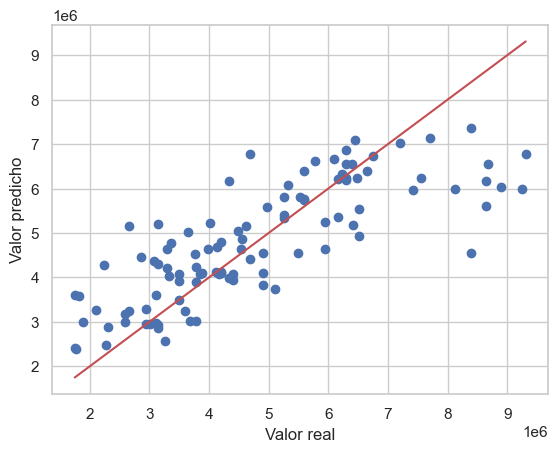

In [1197]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], "r")
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.show()

Métricas

In [1198]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [1199]:
model.score(X_train, y_train)

0.6521608576130691

In [1200]:
model.score(X_test, y_test)

0.6221812123648331

Métricas de rendimiento

In [1201]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [1202]:
print(f'R al cuadrado (R²): {round(r2_score(y_test, y_pred), 4)} Objetivo --> 1')
print(f'Error Cuadrático Medio (Mean Squared Error MSE): {mean_squared_error(y_test, y_pred).round(2)} Objetivo --> 0')
print(f'Error Absoluto Medio (Mean Absolute Error MAE): {mean_absolute_error(y_test, y_pred).round(2)} Objetivo --> 0')

R al cuadrado (R²): 0.6222 Objetivo --> 1
Error Cuadrático Medio (Mean Squared Error MSE): 1329984454289.32 Objetivo --> 0
Error Absoluto Medio (Mean Absolute Error MAE): 840349.0 Objetivo --> 0


In [1203]:
mse**0.5

1153249.5195270267

# Arbol de decisión

In [1204]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
12,9310000,6550,4,2,2,2,1,1,1,2,1,2,1
13,9240000,3500,4,2,2,2,1,1,2,1,2,1,3
14,9240000,7800,3,2,2,2,1,1,1,1,0,2,1
15,9100000,6000,4,1,2,2,1,2,1,1,2,1,1
16,9100000,6600,4,2,2,2,2,2,1,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,2,1,1,2,1,2
541,1767150,2400,3,1,1,1,1,1,1,1,0,1,1
542,1750000,3620,2,1,1,2,1,1,1,1,0,1,2
543,1750000,2910,3,1,1,1,1,1,1,1,0,1,3


In [1205]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

Normalización (en regresión y arbol de decisión no suele variar)

In [1206]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_sin_columnas = ss.fit_transform(data)
datos_normalizados = pd.DataFrame(data_sin_columnas, columns = data.columns)

from sklearn.model_selection import train_test_split
y = datos_normalizados['price']
X = datos_normalizados.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Si no quiero usar datos normalizados ejecuto la siguiente celda para recuprar los datos originales

In [1207]:
datos_normalizados = data.copy()

In [1208]:
datos_normalizados.describe().T

,count,mean,std,min,25%,50%,75%,max
price,524.0,4.604489e+06,1.626982e+06,1750000.0,3428250.0,4270000.0,5600000.0,9310000.0
area,524.0,4.939382e+03,1.841432e+03,1650.0,3520.0,4500.0,6100.0,10700.0
bedrooms,524.0,2.946565e+00,7.323498e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,524.0,1.267176e+00,4.680937e-01,1.0,1.0,1.0,2.0,3.0
stories,524.0,1.793893e+00,8.610328e-01,1.0,1.0,2.0,2.0,4.0
mainroad,524.0,1.853053e+00,3.543910e-01,1.0,2.0,2.0,2.0,2.0
guestroom,524.0,1.177481e+00,3.824403e-01,1.0,1.0,1.0,1.0,2.0
basement,524.0,1.345420e+00,4.759593e-01,1.0,1.0,1.0,2.0,2.0
hotwaterheating,524.0,1.043893e+00,2.050531e-01,1.0,1.0,1.0,1.0,2.0
airconditioning,524.0,1.307252e+00,4.617956e-01,1.0,1.0,1.0,2.0,2.0


Separo la variable dependiente e independientes

In [1209]:
y = datos_normalizados['price']
X = datos_normalizados.drop('price', axis=1)

Divido los datos en conjuntos de entrenamiento y prueba

In [1210]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

Crear y ajustar el modelo de árbol de decisión para regresión

In [1211]:
model= DecisionTreeRegressor(max_depth=7, random_state=42, min_samples_leaf=5,)
"""
model = DecisionTreeRegressor(criterion='squared_error',
                              max_depth=15,
                              max_features=None,
                              max_leaf_nodes=None,
                              min_impurity_decrease=0.0,
                              min_samples_leaf=5,
                              min_samples_split=2,
                              min_weight_fraction_leaf=0.0,
                              random_state=None,
                              splitter='best')
"""

"\nmodel = DecisionTreeRegressor(criterion='squared_error',\n                              max_depth=15,\n                              max_features=None,\n                              max_leaf_nodes=None,\n                              min_impurity_decrease=0.0,\n                              min_samples_leaf=5,\n                              min_samples_split=2,\n                              min_weight_fraction_leaf=0.0,\n                              random_state=None,\n                              splitter='best')\n"

In [1212]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, random_state=42)

Hago predicciones en el conjunto de prueba

In [1213]:
y_pred = model.predict(X_test)

Calculo métricas de rendimiento

In [1214]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 1679477149635.0085
Mean Absolute Error (MAE): 945040.200883889
R-squared (R²): 0.45737809586599754


Gráfico de predicciones de los datos VS los datos reales

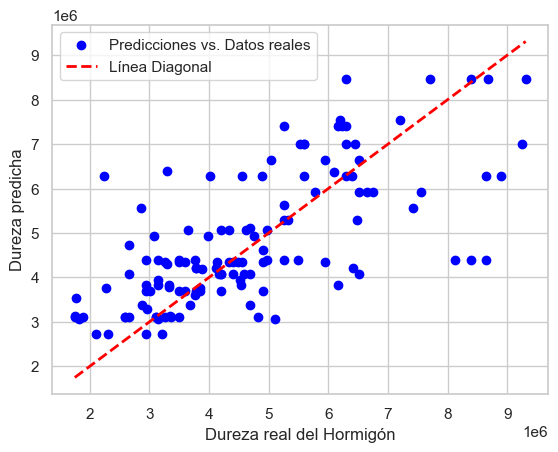

In [1215]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Predicciones vs. Datos reales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Línea Diagonal')
plt.xlabel('Dureza real del Hormigón')
plt.ylabel('Dureza predicha')
plt.legend()
plt.show()

Represento gráficamente el arbol de decision model

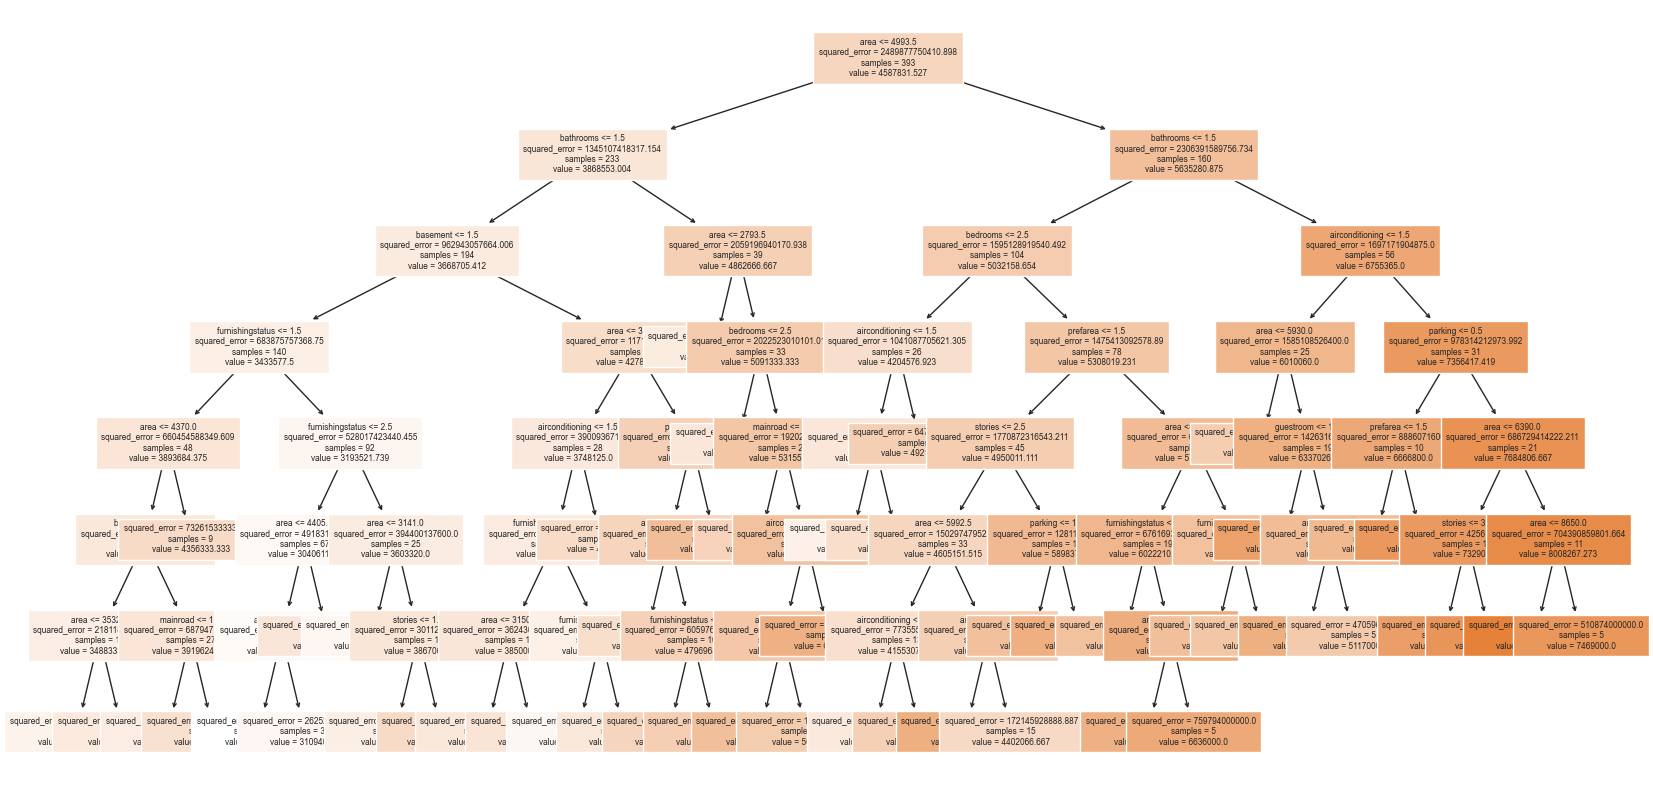

In [1216]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib.pyplot as plt

# ... (previous code remains the same)

# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, filled=True, fontsize=6)
plt.show()

Obtengo las importancia de las características

In [1217]:
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Variable': X.columns, 'Importancias': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importancias', ascending=False)
feature_importance_df

,Variable,Importancias
0,area,0.517530
2,bathrooms,0.211054
8,airconditioning,0.057571
1,bedrooms,0.047268
11,furnishingstatus,0.039173
6,basement,0.038015
10,prefarea,0.026079
3,stories,0.024513
9,parking,0.021895
5,guestroom,0.010251


Grafico las importancias

In [1218]:
import altair as alt

# Create a bar chart of feature importances
alt.Chart(feature_importance_df).mark_bar().encode(
    x=alt.X('Importancias', title='Importancia'),  # X-axis represents feature importances
    y=alt.Y('Variable', sort='-x', title='Variable'),  # Y-axis represents the variable names, sorted by importance in descending order
    tooltip=['Variable', 'Importancias']  # Add tooltips to display both variable name and importance when hovering
).properties(
    title='Importancias de las variables' # Set chart title
)

c:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

Elimino la variable 'hotwaterheating' por que no tiene importancia

In [1219]:
print(df.columns)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'y_pred'],
      dtype='object')


In [1220]:
#data = data.drop(data['hotwaterheating'], axis=1)
data.drop(columns=['hotwaterheating'], inplace=True)

data

C:\Users\User\AppData\Local\Temp\ipykernel_17232\3677043300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['hotwaterheating'], inplace=True)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
12,9310000,6550,4,2,2,2,1,1,2,1,2,1
13,9240000,3500,4,2,2,2,1,1,1,2,1,3
14,9240000,7800,3,2,2,2,1,1,1,0,2,1
15,9100000,6000,4,1,2,2,1,2,1,2,1,1
16,9100000,6600,4,2,2,2,2,2,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,2,1,2,1,2
541,1767150,2400,3,1,1,1,1,1,1,0,1,1
542,1750000,3620,2,1,1,2,1,1,1,0,1,2
543,1750000,2910,3,1,1,1,1,1,1,0,1,3


In [1221]:
y = data['price']
X = data.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

model= DecisionTreeRegressor(max_depth=7, random_state=42, min_samples_leaf=5,)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 1679477149635.0085
Mean Absolute Error (MAE): 945040.200883889
R-squared (R²): 0.45737809586599754


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn.model_selection import cross_val_score # Validación cruzada

Defino el modelo con todos sus parametros


In [1223]:
RF = RandomForestRegressor(n_estimators=500,
                           criterion='squared_error',
                           max_features=1.0,
                           max_depth=15,
                           min_samples_split=5,
                           min_samples_leaf=3,
                           max_leaf_nodes=None,
                           min_impurity_decrease=0,
                           bootstrap=True,
                           oob_score=True,
                           n_jobs=1,
                           random_state=None,
                           verbose=0,
                           warm_start=False)

In [1224]:
clf = RF.fit(X, y)

Validacion cruzada


In [1225]:
scores = cross_val_score(RF, X, y, cv=5)
print(scores.mean())
print(scores)

-10.94701543043132
[ -4.98712597  -7.59489266 -17.40868516 -14.14905239 -10.59532098]


Dividir los datos en conjuntos de entrenamiento y prueba
(La separación train-test no se realiza ya que se usa cross validation)

In [1226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [1227]:
y_pred = RF.predict(X_test)

Gráfico de Predicciones VS Datos Reales

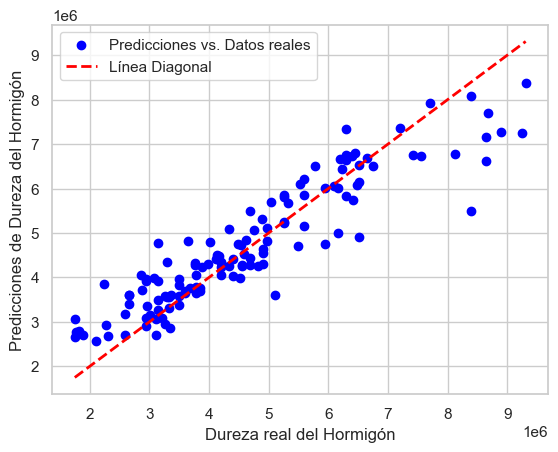

In [1228]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Predicciones vs. Datos reales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Línea Diagonal')
plt.xlabel('Dureza real del Hormigón')
plt.ylabel('Predicciones de Dureza del Hormigón')
plt.legend()
plt.show()

Importancias de las variables

In [1229]:
importancias = pd.DataFrame(clf.feature_importances_)
importancias.index = (X.columns)
print(importancias)

                         0
area              0.480750
bedrooms          0.030297
bathrooms         0.183407
stories           0.050305
mainroad          0.009857
guestroom         0.015720
basement          0.033847
airconditioning   0.068566
parking           0.046661
prefarea          0.028630
furnishingstatus  0.051961


In [1230]:
'''y = data['price']
X = data.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

model= DecisionTreeRegressor(max_depth=7, random_state=42, min_samples_leaf=5,)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)'''

"y = data['price']\nX = data.drop('price', axis=1)\n\nX_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)\n\nmodel= DecisionTreeRegressor(max_depth=7, random_state=42, min_samples_leaf=5,)\n\n\nmodel.fit(X_train, y_train)\n\ny_pred = model.predict(X_test)"

In [1231]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 527601698487.65674
Mean Absolute Error (MAE): 534830.6576528363
R-squared (R²): 0.8295372828859723


In [1232]:
RF.score(X_test, y_test)

0.8295372828859723

# XGBOOST

In [1233]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1234]:
from xgboost import plot_importance
import xgboost as xgb

In [1235]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Normalización

In [1236]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_sin_columnas = ss.fit_transform(data)
datos_normalizados = pd.DataFrame(data_sin_columnas, columns = data.columns)

from sklearn.model_selection import train_test_split
y = datos_normalizados['price']
X = datos_normalizados.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Si no se desea usar datos normalizados ejecuto esta celda para recuperar los originales

In [1237]:
datos_normalizados = data.copy()

In [1238]:
datos_normalizados.describe().T

,count,mean,std,min,25%,50%,75%,max
price,524.0,4.604489e+06,1.626982e+06,1750000.0,3428250.0,4270000.0,5600000.0,9310000.0
area,524.0,4.939382e+03,1.841432e+03,1650.0,3520.0,4500.0,6100.0,10700.0
bedrooms,524.0,2.946565e+00,7.323498e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,524.0,1.267176e+00,4.680937e-01,1.0,1.0,1.0,2.0,3.0
stories,524.0,1.793893e+00,8.610328e-01,1.0,1.0,2.0,2.0,4.0
mainroad,524.0,1.853053e+00,3.543910e-01,1.0,2.0,2.0,2.0,2.0
guestroom,524.0,1.177481e+00,3.824403e-01,1.0,1.0,1.0,1.0,2.0
basement,524.0,1.345420e+00,4.759593e-01,1.0,1.0,1.0,2.0,2.0
airconditioning,524.0,1.307252e+00,4.617956e-01,1.0,1.0,1.0,2.0,2.0
parking,524.0,6.564885e-01,8.412955e-01,0.0,0.0,0.0,1.0,3.0


Definimos el modelo con todos sus parametros

In [ ]:
xgb_model = xgb.XGBRegressor(base_score=1,
                             colsample_bylevel=0.8,
                             colsample_bytree=0.8,
                             gamma=0,
                             learning_rate=0.1,
                             max_delta_step=0,
                             max_depth=3,
                             min_child_weight=1,
                             missing=1,
                             n_estimators=200,
                             objective='reg:squarederror',
                             reg_alpha=0,
                             reg_lambda=1,
                             scale_pos_weight=1,
                             seed=0,
                             subsample=1)

In [1240]:
modeloxgb = xgb_model.fit(X, y)

In [1241]:
# Analizamos la fiabilidad sobre los datos utilizados para crear el modelo.
xgb_model.score(X, y)

0.8367774073118995

In [1242]:
# Validación cruzada
from sklearn.model_selection import cross_val_score

In [1243]:
# Procedemos a realizar validacion cruzada
scores = cross_val_score(xgb_model, X, y, cv=5)
print(scores.mean())
print(scores)

-10.848124121516987
[ -4.16821808  -7.53406608 -14.4211648  -18.1860369   -9.93113475]


#### El ultimo paso es determinar la importancia de cada una de las variables


In [ ]:
importancias = pd.DataFrame(xgb_model.feature_importances_)
importancias.index = (X.columns)
print(importancias)

                         0
area              0.085140
bedrooms          0.041674
bathrooms         0.232857
stories           0.063006
mainroad          0.096896
guestroom         0.039902
basement          0.048289
airconditioning   0.245717
parking           0.048042
prefarea          0.062520
furnishingstatus  0.035958


In [1245]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 24260713516679.098
Mean Absolute Error (MAE): 4724797.921957271
R-squared (R²): -20709175523883.55
